# UTILIZING MACHINE LEARNING WITH NFL DATA
## Flatiron School - Cohort 100719 - Part-Time, Online
### Name - Acusio Bivona
### Instructor - James Irving

### Speaking from a personal level, I absolutely love football. I was blessed to play the game starting at 8 years old and was fortunate enough to play all the way through my junior year of college. This game has brought me joy that very few things in life have been able to match. I was so excited when I was able to find this kind of data publically avaialable and was even more excited to use the power of machine learning on it! 

> **NFL play data from 2009-2017 Dataset:**
- 7,068 predictors
- 407,688 entries of data
- Total: 2.88 billion pieces of data
- https://www.kaggle.com/maxhorowitz/nflplaybyplay2009to2016

> **Two objectives:**
- Classify a play as being a touchdown or not a touchdown
- Determine most important predictors


# Step 1 - Import data and preprocess

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")
df.head()

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


## Columns & Descriptions
 - Drive - Indicator of times ball has been possessed. Team does not matter
 - qtr - Quarter
 - down - Which down is being played
 - TimeUnder - Minutes portioned into 16 intervals (0-15)
 - TimeSecs - Total amount of seconds remaining, starting from 3600 (60 minutes)
 - SideofField - Ball is either in offense's territory or defense's territory
 - yrdln - which yardline ball is on at beginning of play, from 1-50
 - yrdline100 - which yardline ball is on in respect to the whole field - 1-100
 - ydstogo - Yards needed for a first down
 - GoalToGo - Is the ball within the opoonent's 10 yard line? (Yes/No)
 - FirstDown - Whether play resulted in a first down
 - Offensiveteam - Offensive team
 - DefensiveTeam - Defensive Team
 - PlayAttempted - Whether play was attempted?
 - Yards.Gained - Amount of yards gained
 - Touchdown - Touchdown scored (Yes/No)
 - PuntResult - Whether punt was clean or blocked
 - PlayType - Type of play
 - Passer - Who threw the ball
 - PassAttempt - Was a pass attempted (Yes/No)
 - PassOutcome - Complete or incomplete
 - PassLength - Short or deep
 - AirYards - Distance ball traveled in the air
 - YardsAfterCatch - How many yards gained after ball was received
 - QBHit - Was the quarterback hit on the play? (Not exclusively sacks)
 - PassLocation - Left,right, middle
 - InterceptionThrown - Was there an interception (Yes/No)
 - Interceptor - Who intercepted the pass
 - Rusher - Who ran the ball
 - RushAttempt - Was it a rushing play (Yes/No)
 - RunLocation - Left, right, middle
 - RunGap - More specifically where the ball was rushed (end, tackle, guard)
 - Receiver - Who caught the ball
 - Reception - Was the ball caught?
 - Returner - Which player returned the ball on a kickoff or punt
 - Fumble - Was the ball fumbled (Yes/No)
 - RecFumbTeam - Name of team that recovered the fumble
 - RecFumbPlayer - Name of player that recovered the fumble
 - Sack - Was there a sack (Yes/No)
 - OffensiveTeamScore - Amount of total points for offensive team?
 - DefensiveTeamScore - Amount of total points allowed for defensive team?
 - ScoreDiff - Point differential
 - AbsScoreDiff - Absolute value of ScoreDiff
 - HomeTeam - Name of home team
 - AwayTeam - Name of away team
 - Timeout_Indicator - Was a timeout called on the play? (Yes/No)
 - Season - Year of NFL season

### This dataset has columns representing various types of probabilities that the original creators of the dataset decided to run. Since those probability equations are not part of the raw data, I am dropping them.

In [3]:
df.drop(['No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 
         'Field_Goal_Prob','Safety_Prob', 'Touchdown_Prob', 'ExPoint_Prob', 'TwoPoint_Prob', 'ExpPts', 
         'EPA', 'airEPA', 'yacEPA','Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 
         'Win_Prob', 'WPA', 'airWPA','yacWPA'],axis=1,inplace=True)

### There is also a number of columns that have no significance in touchdowns being scored. These columns will also be dropped.

In [4]:
df.drop(['GameID', 'time', 'Date', 'PlayTimeDiff', 'ydsnet', 'ExPointResult', 'TwoPointConv', 
        'desc', 'ExPointResult', 'TwoPointConv', 'DefTwoPoint', 'Safety', 'Onsidekick', 'Passer_ID',
         'BlockingPlayer', 'Tackler1', 'Tackler2', 'Rusher_ID', 'Receiver_ID', 'FieldGoalResult', 
         'FieldGoalDistance', 'Challenge.Replay', 'ChalReplayResult', 'Accepted.Penalty', 
         'PenalizedTeam', 'PenaltyType', 'PenalizedPlayer', 'Penalty.Yards','Timeout_Team', 
         'posteam_timeouts_pre', 'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
         'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post', 'sp', 'ReturnResult'], axis=1, 
          inplace=True)


In [5]:
df.head()

,Drive,qtr,down,TimeUnder,TimeSecs,SideofField,yrdln,yrdline100,ydstogo,GoalToGo,...,RecFumbPlayer,Sack,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Season
0,1,1,NaN,15,3600.0,TEN,30.0,30.0,0,0.0,...,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,2009
1,1,1,1.0,15,3593.0,PIT,42.0,58.0,10,0.0,...,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,2009
2,1,1,2.0,15,3556.0,PIT,47.0,53.0,5,0.0,...,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,2009
3,1,1,3.0,14,3515.0,PIT,44.0,56.0,8,0.0,...,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,2009
4,1,1,4.0,14,3507.0,PIT,44.0,56.0,8,0.0,...,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,2009


## Examine datatypes & details of dataset 

In [6]:
pd.set_option('display.max_rows', 500)
df.dtypes

Drive                   int64
qtr                     int64
down                  float64
TimeUnder               int64
TimeSecs              float64
SideofField            object
yrdln                 float64
yrdline100            float64
ydstogo                 int64
GoalToGo              float64
FirstDown             float64
posteam                object
DefensiveTeam          object
PlayAttempted           int64
Yards.Gained            int64
Touchdown               int64
PuntResult             object
PlayType               object
Passer                 object
PassAttempt             int64
PassOutcome            object
PassLength             object
AirYards                int64
YardsAfterCatch         int64
QBHit                   int64
PassLocation           object
InterceptionThrown      int64
Interceptor            object
Rusher                 object
RushAttempt             int64
RunLocation            object
RunGap                 object
Receiver               object
Reception 

In [7]:
df.describe()

,Drive,qtr,down,TimeUnder,TimeSecs,yrdln,yrdline100,ydstogo,GoalToGo,FirstDown,...,RushAttempt,Reception,Fumble,Sack,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,Season
count,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,406848.000000,406848.000000,407688.000000,406848.000000,378877.000000,...,407688.000000,407688.000000,407688.000000,407688.000000,380784.000000,380784.000000,382700.000000,380784.000000,407688.000000,407688.000000
mean,12.316158,2.577412,2.002476,7.374200,1695.268944,28.488327,48.644081,7.309403,0.049134,0.290509,...,0.296381,0.248418,0.014158,0.027195,10.201424,11.414484,-1.186590,7.783541,0.041215,2013.018985
std,7.149527,1.129750,1.006353,4.642388,1062.801012,12.946471,25.070416,4.869987,0.216148,0.453998,...,0.456662,0.432096,0.118142,0.162651,9.432067,9.910753,10.741756,7.453598,0.198788,2.576962
min,1.000000,1.000000,1.000000,0.000000,-900.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,0.000000,2009.000000
25%,6.000000,2.000000,1.000000,3.000000,778.000000,20.000000,30.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,-7.000000,3.000000,0.000000,2011.000000
50%,12.000000,3.000000,2.000000,7.000000,1800.000000,30.000000,49.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,10.000000,0.000000,7.000000,0.000000,2013.000000
75%,18.000000,4.000000,3.000000,11.000000,2585.000000,39.000000,70.000000,10.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,16.000000,17.000000,4.000000,11.000000,0.000000,2015.000000
max,35.000000,5.000000,4.000000,15.000000,3600.000000,50.000000,99.000000,50.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,61.000000,61.000000,59.000000,59.000000,1.000000,2017.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Data columns (total 47 columns):
Drive                 407688 non-null int64
qtr                   407688 non-null int64
down                  346534 non-null float64
TimeUnder             407688 non-null int64
TimeSecs              407464 non-null float64
SideofField           407160 non-null object
yrdln                 406848 non-null float64
yrdline100            406848 non-null float64
ydstogo               407688 non-null int64
GoalToGo              406848 non-null float64
FirstDown             378877 non-null float64
posteam               382696 non-null object
DefensiveTeam         382696 non-null object
PlayAttempted         407688 non-null int64
Yards.Gained          407688 non-null int64
Touchdown             407688 non-null int64
PuntResult            22371 non-null object
PlayType              407688 non-null object
Passer                167643 non-null object
PassAttempt           407688 non-nul

## Discover and solve null values

In [9]:
df.isna().sum()

Drive                      0
qtr                        0
down                   61154
TimeUnder                  0
TimeSecs                 224
SideofField              528
yrdln                    840
yrdline100               840
ydstogo                    0
GoalToGo                 840
FirstDown              28811
posteam                24992
DefensiveTeam          24992
PlayAttempted              0
Yards.Gained               0
Touchdown                  0
PuntResult            385317
PlayType                   0
Passer                240045
PassAttempt                0
PassOutcome           239506
PassLength            240520
AirYards                   0
YardsAfterCatch            0
QBHit                      0
PassLocation          240520
InterceptionThrown         0
Interceptor           403168
Rusher                287124
RushAttempt                0
RunLocation           288178
RunGap                320260
Receiver              246127
Reception                  0
Returner      

## Functions to fill null values

In [10]:
def fill_cols_na(df, column):
    
    """There are a substantial number of columns where 'N/A' is necessary to fill in for null values. This 
    function will accomplish that.
    
    Parameters:
    
    df - dataframe to pull columns from
    
    column - can be a single column or list of columns"""
        
    df2 = df.copy()
    
    df2[column] = df2[column].fillna('N/A')
    
    return df2

In [11]:
def fill_cols_0(df, column):
    
    """There are also a few columns where the float 0.0 is suitable for missing values. This fucntion will
    fill these values.
    
    Parameters:
    
    df - dataframe to pull columns from
    
    column - can be a single column or list of columns"""
    
    df2 = df.copy()
    
    df2[column] = df2[column].fillna(0.0)
    
    return df2

In [12]:
df = fill_cols_0(df, ['down', 'TimeSecs', 'yrdln', 'yrdline100', 'FirstDown', 'PosTeamScore', 'DefTeamScore',
                 'ScoreDiff', 'AbsScoreDiff', 'GoalToGo'])

In [13]:
df = fill_cols_na(df, ['SideofField', 'posteam', 'DefensiveTeam', 'PuntResult', 'Passer', 'PassOutcome',
                      'PassLength', 'PassLocation', 'Interceptor', 'Rusher', 'RunLocation', 'RunGap', 'Receiver',
                      'Returner', 'RecFumbTeam', 'RecFumbPlayer'])

In [14]:
df.isna().sum()

Drive                 0
qtr                   0
down                  0
TimeUnder             0
TimeSecs              0
SideofField           0
yrdln                 0
yrdline100            0
ydstogo               0
GoalToGo              0
FirstDown             0
posteam               0
DefensiveTeam         0
PlayAttempted         0
Yards.Gained          0
Touchdown             0
PuntResult            0
PlayType              0
Passer                0
PassAttempt           0
PassOutcome           0
PassLength            0
AirYards              0
YardsAfterCatch       0
QBHit                 0
PassLocation          0
InterceptionThrown    0
Interceptor           0
Rusher                0
RushAttempt           0
RunLocation           0
RunGap                0
Receiver              0
Reception             0
Returner              0
Fumble                0
RecFumbTeam           0
RecFumbPlayer         0
Sack                  0
PosTeamScore          0
DefTeamScore          0
ScoreDiff       

In [15]:
df.rename(columns={'posteam': 'OffensiveTeam', 'PosTeamScore': 'OffensiveTeamScore', 
                   'DefTeamScore': 'DefensiveTeamScore'}, inplace=True)
### I renamed these for the sake of easier understanding. I thought the original names were a bit ambiguous.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Data columns (total 47 columns):
Drive                 407688 non-null int64
qtr                   407688 non-null int64
down                  407688 non-null float64
TimeUnder             407688 non-null int64
TimeSecs              407688 non-null float64
SideofField           407688 non-null object
yrdln                 407688 non-null float64
yrdline100            407688 non-null float64
ydstogo               407688 non-null int64
GoalToGo              407688 non-null float64
FirstDown             407688 non-null float64
OffensiveTeam         407688 non-null object
DefensiveTeam         407688 non-null object
PlayAttempted         407688 non-null int64
Yards.Gained          407688 non-null int64
Touchdown             407688 non-null int64
PuntResult            407688 non-null object
PlayType              407688 non-null object
Passer                407688 non-null object
PassAttempt           407688 non-nu

### Display my categorical and numerical variables separately

In [17]:
pd.set_option('display.max_columns', 500)

df.select_dtypes(include='O')

,SideofField,OffensiveTeam,DefensiveTeam,PuntResult,PlayType,Passer,PassOutcome,PassLength,PassLocation,Interceptor,Rusher,RunLocation,RunGap,Receiver,Returner,RecFumbTeam,RecFumbPlayer,HomeTeam,AwayTeam
0,TEN,PIT,TEN,N/A,Kickoff,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,S.Logan,N/A,N/A,PIT,TEN
1,PIT,PIT,TEN,N/A,Pass,B.Roethlisberger,Complete,Short,left,N/A,N/A,N/A,N/A,H.Ward,N/A,N/A,N/A,PIT,TEN
2,PIT,PIT,TEN,N/A,Run,N/A,N/A,N/A,N/A,N/A,W.Parker,right,end,N/A,N/A,N/A,N/A,PIT,TEN
3,PIT,PIT,TEN,N/A,Pass,B.Roethlisberger,Incomplete Pass,Deep,right,N/A,N/A,N/A,N/A,M.Wallace,N/A,N/A,N/A,PIT,TEN
4,PIT,PIT,TEN,Clean,Punt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,PIT,TEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,BAL,N/A,N/A,N/A,Timeout,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,BAL,CIN
407684,BAL,BAL,CIN,N/A,Pass,J.Flacco,Incomplete Pass,Short,middle,N/A,N/A,N/A,N/A,M.Wallace,N/A,N/A,N/A,BAL,CIN
407685,BAL,BAL,CIN,N/A,Pass,J.Flacco,Complete,Short,middle,N/A,N/A,N/A,N/A,B.Watson,N/A,N/A,N/A,BAL,CIN
407686,BAL,CIN,BAL,N/A,QB Kneel,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,BAL,CIN


In [18]:
df.select_dtypes(include='number')

,Drive,qtr,down,TimeUnder,TimeSecs,yrdln,yrdline100,ydstogo,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,Touchdown,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,Fumble,Sack,OffensiveTeamScore,DefensiveTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,Season
0,1,1,0.0,15,3600.0,30.0,30.0,0,0.0,0.0,1,39,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,2009
1,1,1,1.0,15,3593.0,42.0,58.0,10,0.0,0.0,1,5,0,1,-3,8,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0,2009
2,1,1,2.0,15,3556.0,47.0,53.0,5,0.0,0.0,1,-3,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0,2009
3,1,1,3.0,14,3515.0,44.0,56.0,8,0.0,0.0,1,0,0,1,34,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,2009
4,1,1,4.0,14,3507.0,44.0,56.0,8,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,29,4,0.0,1,28.0,32.0,32.0,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,2017
407684,29,4,3.0,1,28.0,23.0,77.0,14,0.0,0.0,1,0,0,1,12,0,0,0,0,0,0,0,27.0,30.0,-3.0,3.0,0,2017
407685,29,4,4.0,1,24.0,23.0,77.0,14,0.0,1.0,1,13,0,1,10,3,0,0,0,1,0,0,27.0,30.0,-3.0,3.0,0,2017
407686,30,4,1.0,1,14.0,36.0,36.0,10,0.0,0.0,1,-1,0,0,0,0,0,0,0,0,0,0,30.0,27.0,3.0,3.0,0,2017


# Step 2 - Libraries, class imbalances, and train-test split

## Import necessary libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
plt.style.use('seaborn-talk')

## Create functions to visualize model performance

In [87]:
def plot_features(clf, top_n = 8, figsize = (9,9)):
    
    """This function will allow me to visualize the most important predictors.
    
    #Parameters:
    
    #clf - The name for your model.
    
    #top_n - How many features you want displayed. The default value is 8.
    
    #figsize - The size of the visual. Default value is (9,9)"""
    
    df_features = pd.Series(clf.feature_importances_, index = X_train.columns)
    df_features.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    
    plt.xlabel('Feature Importance')
    plt.show()
    
    return df_features

In [65]:
import sklearn.metrics as metrics

def model_performance(y_true, pred, X_true, clf):
    
    """This function will create and return a classification report, a confusion matrix, an ROC-AUC visual, and 
    the most important features in model pefromance.
    
    Parameters:
    
    y_true - The y testing data
    
    pred - The y prediction data
    
    X_true - The X testing data
    
    clf - Name of your model"""
    
    #Print Classification Report
    
    print(metrics.classification_report(y_true, pred))
    
    #Visualize Confusion Matrix
    
    fig, ax = plt.subplots(figsize=(11,5), ncols=2)
    metrics.plot_confusion_matrix(clf, X_true, y_true, cmap="Purples",
                                  normalize='true',ax=ax[0])
    ax[0].set(title='Confusion Matrix')
    
    #Visualize ROC & AUC
    
    y_score = clf.predict_proba(X_true)[:, 1]
    false_positive, true_positive, thresholds = metrics.roc_curve(y_true, y_score)   
    roc_auc = round(metrics.auc(false_positive, true_positive), 2)
    
    ax[1].plot(false_positive, true_positive, color='gold', label = f'Area Under Curve = {roc_auc}')   
    ax[1].plot([0,1], [0,1], ls='--')  
    ax[1].legend() 
    ax[1].grid()  
    ax[1].set(ylabel='True Positive Rate', xlabel='False Positive Rate',
              title='ROC Curve')
    
    plt.tight_layout() 
    plt.show()
    
    #Visual for most important features
    
    try: 
        df_best_features = plot_features(clf)
        
    except:
        df_best_features = None

In [22]:
def accuracy(X_train, y_train, X_true, y_true, clf):

    """This function will create the accuracy scores for the training and test data for any model that is run.
    
    Parameters:
    
    X_train - X training data
    
    y_train - y training data
    
    X_true - X testing data
    
    y_true - y testing data
    
    clf - Name of your model"""
        
    #Print accuracy for train and test data
        
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_true, y_true)

    print(f"Train score = {train_score}")
    print(f"Test score = {test_score}")

## Get dummies for categorical variables

In [23]:
df2 = pd.get_dummies(df)

df2.head()

,Drive,qtr,down,TimeUnder,TimeSecs,yrdln,yrdline100,ydstogo,GoalToGo,FirstDown,PlayAttempted,Yards.Gained,Touchdown,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,Fumble,Sack,OffensiveTeamScore,DefensiveTeamScore,ScoreDiff,AbsScoreDiff,Timeout_Indicator,Season,SideofField_50,SideofField_ARI,SideofField_ATL,SideofField_BAL,SideofField_BUF,SideofField_CAR,SideofField_CHI,SideofField_CIN,SideofField_CLE,SideofField_DAL,SideofField_DEN,SideofField_DET,SideofField_GB,SideofField_HOU,SideofField_IND,SideofField_JAC,SideofField_JAX,SideofField_KC,SideofField_LA,SideofField_LAC,SideofField_MIA,SideofField_MID,SideofField_MIN,SideofField_N/A,SideofField_NE,SideofField_NO,SideofField_NYG,SideofField_NYJ,SideofField_OAK,SideofField_PHI,SideofField_PIT,SideofField_SD,SideofField_SEA,SideofField_SF,SideofField_STL,SideofField_TB,SideofField_TEN,SideofField_WAS,OffensiveTeam_ARI,OffensiveTeam_ATL,OffensiveTeam_BAL,OffensiveTeam_BUF,OffensiveTeam_CAR,OffensiveTeam_CHI,OffensiveTeam_CIN,OffensiveTeam_CLE,OffensiveTeam_DAL,OffensiveTeam_DEN,OffensiveTeam_DET,OffensiveTeam_GB,OffensiveTeam_HOU,OffensiveTeam_IND,OffensiveTeam_JAC,OffensiveTeam_JAX,OffensiveTeam_KC,OffensiveTeam_LA,OffensiveTeam_LAC,OffensiveTeam_MIA,OffensiveTeam_MIN,OffensiveTeam_N/A,OffensiveTeam_NE,OffensiveTeam_NO,OffensiveTeam_NYG,OffensiveTeam_NYJ,OffensiveTeam_OAK,OffensiveTeam_PHI,OffensiveTeam_PIT,OffensiveTeam_SD,OffensiveTeam_SEA,OffensiveTeam_SF,OffensiveTeam_STL,OffensiveTeam_TB,OffensiveTeam_TEN,OffensiveTeam_WAS,DefensiveTeam_ARI,DefensiveTeam_ATL,DefensiveTeam_BAL,DefensiveTeam_BUF,DefensiveTeam_CAR,DefensiveTeam_CHI,DefensiveTeam_CIN,DefensiveTeam_CLE,DefensiveTeam_DAL,DefensiveTeam_DEN,DefensiveTeam_DET,DefensiveTeam_GB,DefensiveTeam_HOU,DefensiveTeam_IND,DefensiveTeam_JAC,DefensiveTeam_JAX,DefensiveTeam_KC,DefensiveTeam_LA,DefensiveTeam_LAC,DefensiveTeam_MIA,DefensiveTeam_MIN,DefensiveTeam_N/A,DefensiveTeam_NE,DefensiveTeam_NO,DefensiveTeam_NYG,DefensiveTeam_NYJ,DefensiveTeam_OAK,DefensiveTeam_PHI,DefensiveTeam_PIT,DefensiveTeam_SD,DefensiveTeam_SEA,DefensiveTeam_SF,DefensiveTeam_STL,DefensiveTeam_TB,DefensiveTeam_TEN,DefensiveTeam_WAS,PuntResult_Blocked,PuntResult_Clean,PuntResult_N/A,PlayType_End of Game,PlayType_Extra Point,PlayType_Field Goal,PlayType_Half End,PlayType_Kickoff,PlayType_No Play,PlayType_Pass,PlayType_Punt,PlayType_QB Kneel,PlayType_Quarter End,PlayType_Run,PlayType_Sack,PlayType_Spike,PlayType_Timeout,PlayType_Two Minute Warning,Passer_A.Andrews,Passer_A.Boldin,Passer_A.Brown,Passer_A.Dalton,Passer_A.Davis,Passer_A.Edwards,Passer_A.Feeley,Passer_A.Foster,Passer_A.Lee,Passer_A.Luck,Passer_A.McCarron,Passer_A.Morrison,Passer_A.Podlesh,Passer_A.Randle El,Passer_A.Rodgers,Passer_A.Rolle,Passer_A.Sanders,Passer_A.Smith,Passer_A.Tanney,Passer_Ale.Smith,Passer_B.Anger,Passer_B.Banks,Passer_B.Berrian,Passer_B.Bortles,Passer_B.Brohm,Passer_B.Colquitt,Passer_B.Croyle,Passer_B.Daniels,Passer_B.Edwards,Passer_B.Favre,Passer_B.Fields,Passer_B.Gabbert,Passer_B.Gradkowski,Passer_B.Hoyer,Passer_B.Hundley,Passer_B.Kern,Passer_B.LaFell,Passer_B.Leftwich,Passer_B.Lloyd,Passer_B.Marshall,Passer_B.Maynard,Passer_B.Moorman,Passer_B.Nortman,Passer_B.Osweiler,Passer_B.Petty,Passer_B.Powell,Passer_B.Quinn,Passer_B.Rainey,Passer_B.Roethlisberger,Passer_B.Scott,Passer_B.Smith,Passer_B.Volek,Passer_B.Walters,Passer_B.Weeden,Passer_B.Westbrook,Passer_B.Wing,Passer_C.Batch,Passer_C.Beasley,Passer_C.Beathard,Passer_C.Brown,Passer_C.Cook,Passer_C.Daniel,Passer_C.Frye,Passer_C.Hanie,Passer_C.Hanson,Passer_C.Henne,Passer_C.Henry,Passer_C.Hogan,Passer_C.Johnson,Passer_C.Jones,Passer_C.Kaepernick,Passer_C.Keenum,Passer_C.Kessler,Passer_C.Kupp,Passer_C.McCoy,Passer_C.Meredith,Passer_C.Newton,Passer_C.Ochocinco,Passer_C.Painter,Passer_C.Palmer,Passer_C.Pennington,Passer_C.Ponder,Passer_C.Portis,Passer_C.Rachal,Passer_C.Redman,Passer_C.Rush,Passer_C.Santos,Passer_C.Shaw,Passer_C.Shorts,Passer_C.Simms,Passer_C.Wentz,Passer_C.Whitehurst,Passer_

## Target variable = Touchdown

In [24]:
y = df2['Touchdown']

X = df2.drop('Touchdown', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 123, stratify=y)

## Discover and fix class imbalances using SMOTE

In [26]:
df2['Touchdown'].value_counts()
#Slightly imbalanced - Sarcasm

0    395837
1     11851
Name: Touchdown, dtype: int64

In [27]:
print(y_train.value_counts())

print(y_test.value_counts())

0    296878
1      8888
Name: Touchdown, dtype: int64
0    98959
1     2963
Name: Touchdown, dtype: int64


In [28]:
from imblearn.over_sampling import SMOTE

X_train_new, y_train_new = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_train_new).value_counts()) 

/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is depr

1    296878
0    296878
dtype: int64


# Step 3 - Run models and evaluate performance

## Decision Trees Model 1 - Baseline model - No hyperparameter tuning

In [29]:
tree_clf = DecisionTreeClassifier()  

tree_clf.fit(X_train_new, y_train_new) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     98959
           1       0.81      0.86      0.84      2963

    accuracy                           0.99    101922
   macro avg       0.90      0.93      0.92    101922
weighted avg       0.99      0.99      0.99    101922



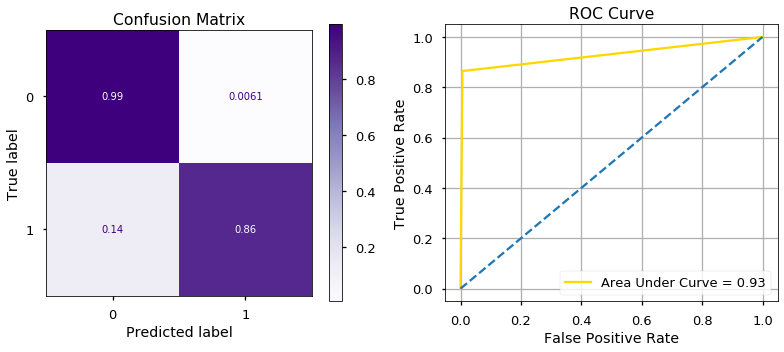

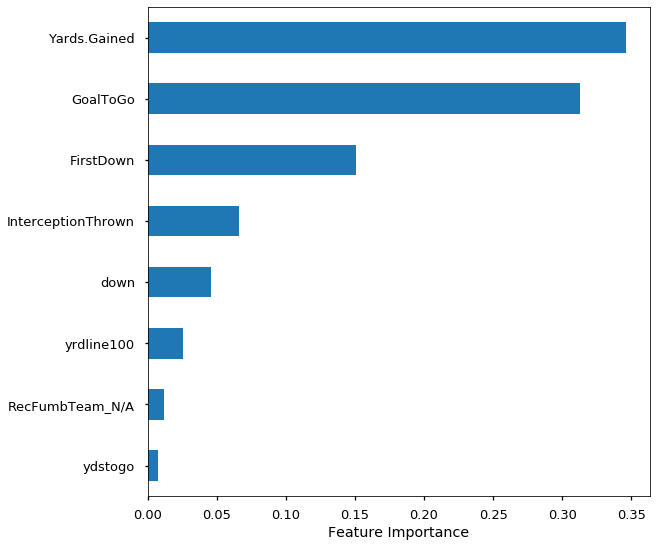

Train score = 1.0
Test score = 0.9901493298797119


In [88]:
pred = tree_clf.predict(X_test)

model_performance(y_test,pred,X_test,tree_clf)

accuracy(X_train_new, y_train_new, X_test, y_test, tree_clf)

## Decision Trees Model 2 - Tune max depth

> ***In an attemept to optimize hyperparameter tuning, I attempeted to use GridSearch. However, due to the size of this dataset, it was too computationally exepensive. Therefore, I used RandomizedSearch to tune max_depth and min_sample_split. The outputs are no longer visible, but the value determined for max_depth was 10 and the value for min_samples_split was 0.25. Those values were used for both the Decision Trees and Random Forest models below that were not the vanilla models.***

In [31]:
#tree_clf_2 = DecisionTreeClassifier()

#param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

#rs_tree = RandomizedSearchCV(tree_clf_2, param_grid, cv=3)
#rs_tree.fit(X_train_new, y_train_new)

#rs_tree.best_params_

In [32]:
tree_clf_2 = DecisionTreeClassifier(max_depth=10)  

tree_clf_2.fit(X_train_new, y_train_new) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     98959
           1       0.69      0.96      0.80      2963

    accuracy                           0.99    101922
   macro avg       0.84      0.97      0.90    101922
weighted avg       0.99      0.99      0.99    101922



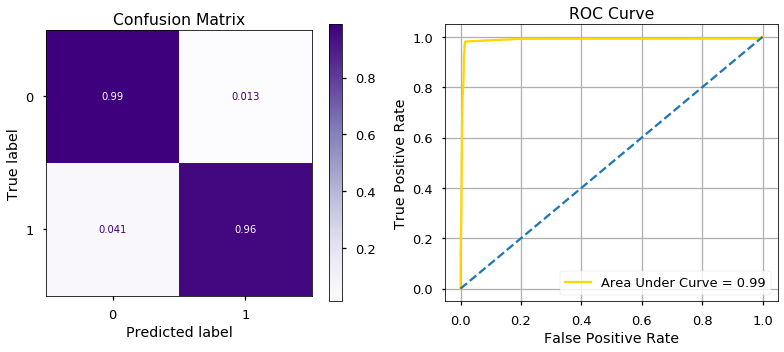

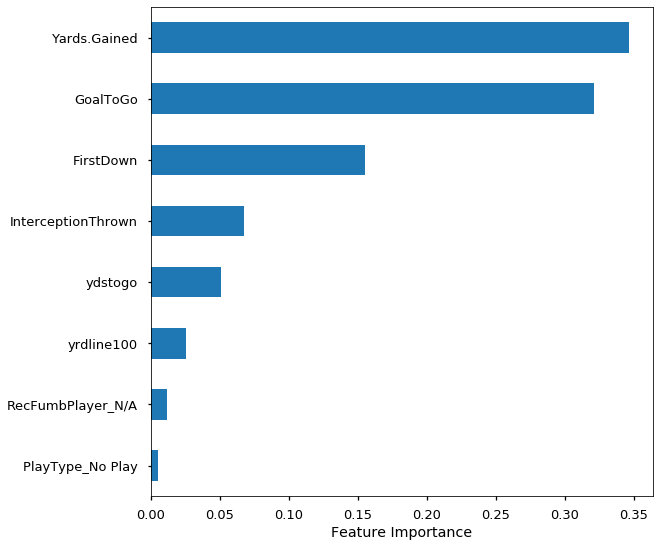

Train score = 0.9932514366170615
Test score = 0.9861560801397147


In [89]:
pred = tree_clf_2.predict(X_test)

model_performance(y_test,pred,X_test,tree_clf_2)

accuracy(X_train_new, y_train_new, X_test, y_test, tree_clf_2)

## Decision Trees Model 3 - Tune max depth and min-samples-split

In [34]:
#tree_clf_3 = DecisionTreeClassifier()

#param_grid = {'criterion': ['gini'], 'max_depth': [10], 'min_samples_split': [0.25, 0.50, 0.75]}

#rs_tree = RandomizedSearchCV(tree_clf_3, param_grid, cv=3)
#rs_tree.fit(X_train_new, y_train_new)

#rs_tree.best_params_

In [35]:
tree_clf_3 = DecisionTreeClassifier(max_depth=10, min_samples_split=.25)  

tree_clf_3.fit(X_train_new, y_train_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     98959
           1       0.27      0.89      0.41      2963

    accuracy                           0.93    101922
   macro avg       0.63      0.91      0.68    101922
weighted avg       0.98      0.93      0.94    101922



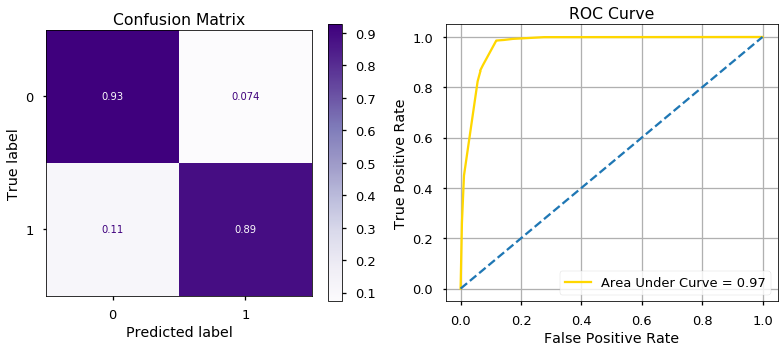

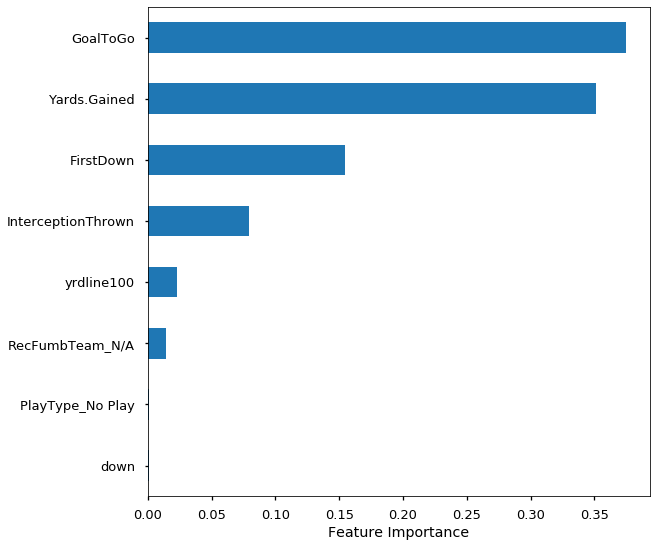

Train score = 0.947737791281267
Test score = 0.9251878887776928


In [90]:
pred = tree_clf_3.predict(X_test)

model_performance(y_test, pred, X_test, tree_clf_3)

accuracy(X_train_new, y_train_new, X_test, y_test, tree_clf_3)

### Visualize relationship between target and important predictors

In [73]:
feature_corr = df2[['Touchdown', 'Yards.Gained', 'GoalToGo', 'FirstDown', 'InterceptionThrown',
                   'yrdline100']].corr()

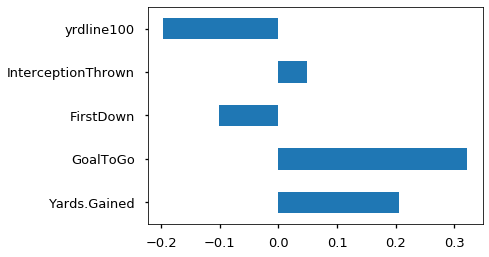

In [74]:
feature_corr.loc['Touchdown'].drop('Touchdown').plot(kind='barh')

In [75]:
feature_corr.corr().style.background_gradient(cmap='Purples')

,Touchdown,Yards.Gained,GoalToGo,FirstDown,InterceptionThrown,yrdline100
Touchdown,1,0.0106195,0.531337,-0.586211,-0.205129,-0.653849
Yards.Gained,0.0106195,1,-0.379246,0.323512,-0.425867,0.105572
GoalToGo,0.531337,-0.379246,1,-0.525847,-0.150911,-0.828702
FirstDown,-0.586211,0.323512,-0.525847,1,-0.0204345,0.326636
InterceptionThrown,-0.205129,-0.425867,-0.150911,-0.0204345,1,-0.0962518
yrdline100,-0.653849,0.105572,-0.828702,0.326636,-0.0962518,1


In [77]:
feature_corr.corr()[['Touchdown']].round(3).style.background_gradient(cmap='Purples')

,Touchdown
Touchdown,1
Yards.Gained,0.011
GoalToGo,0.531
FirstDown,-0.586
InterceptionThrown,-0.205
yrdline100,-0.654


## Visualize the actual tree from Decision Trees Model 3

In [37]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

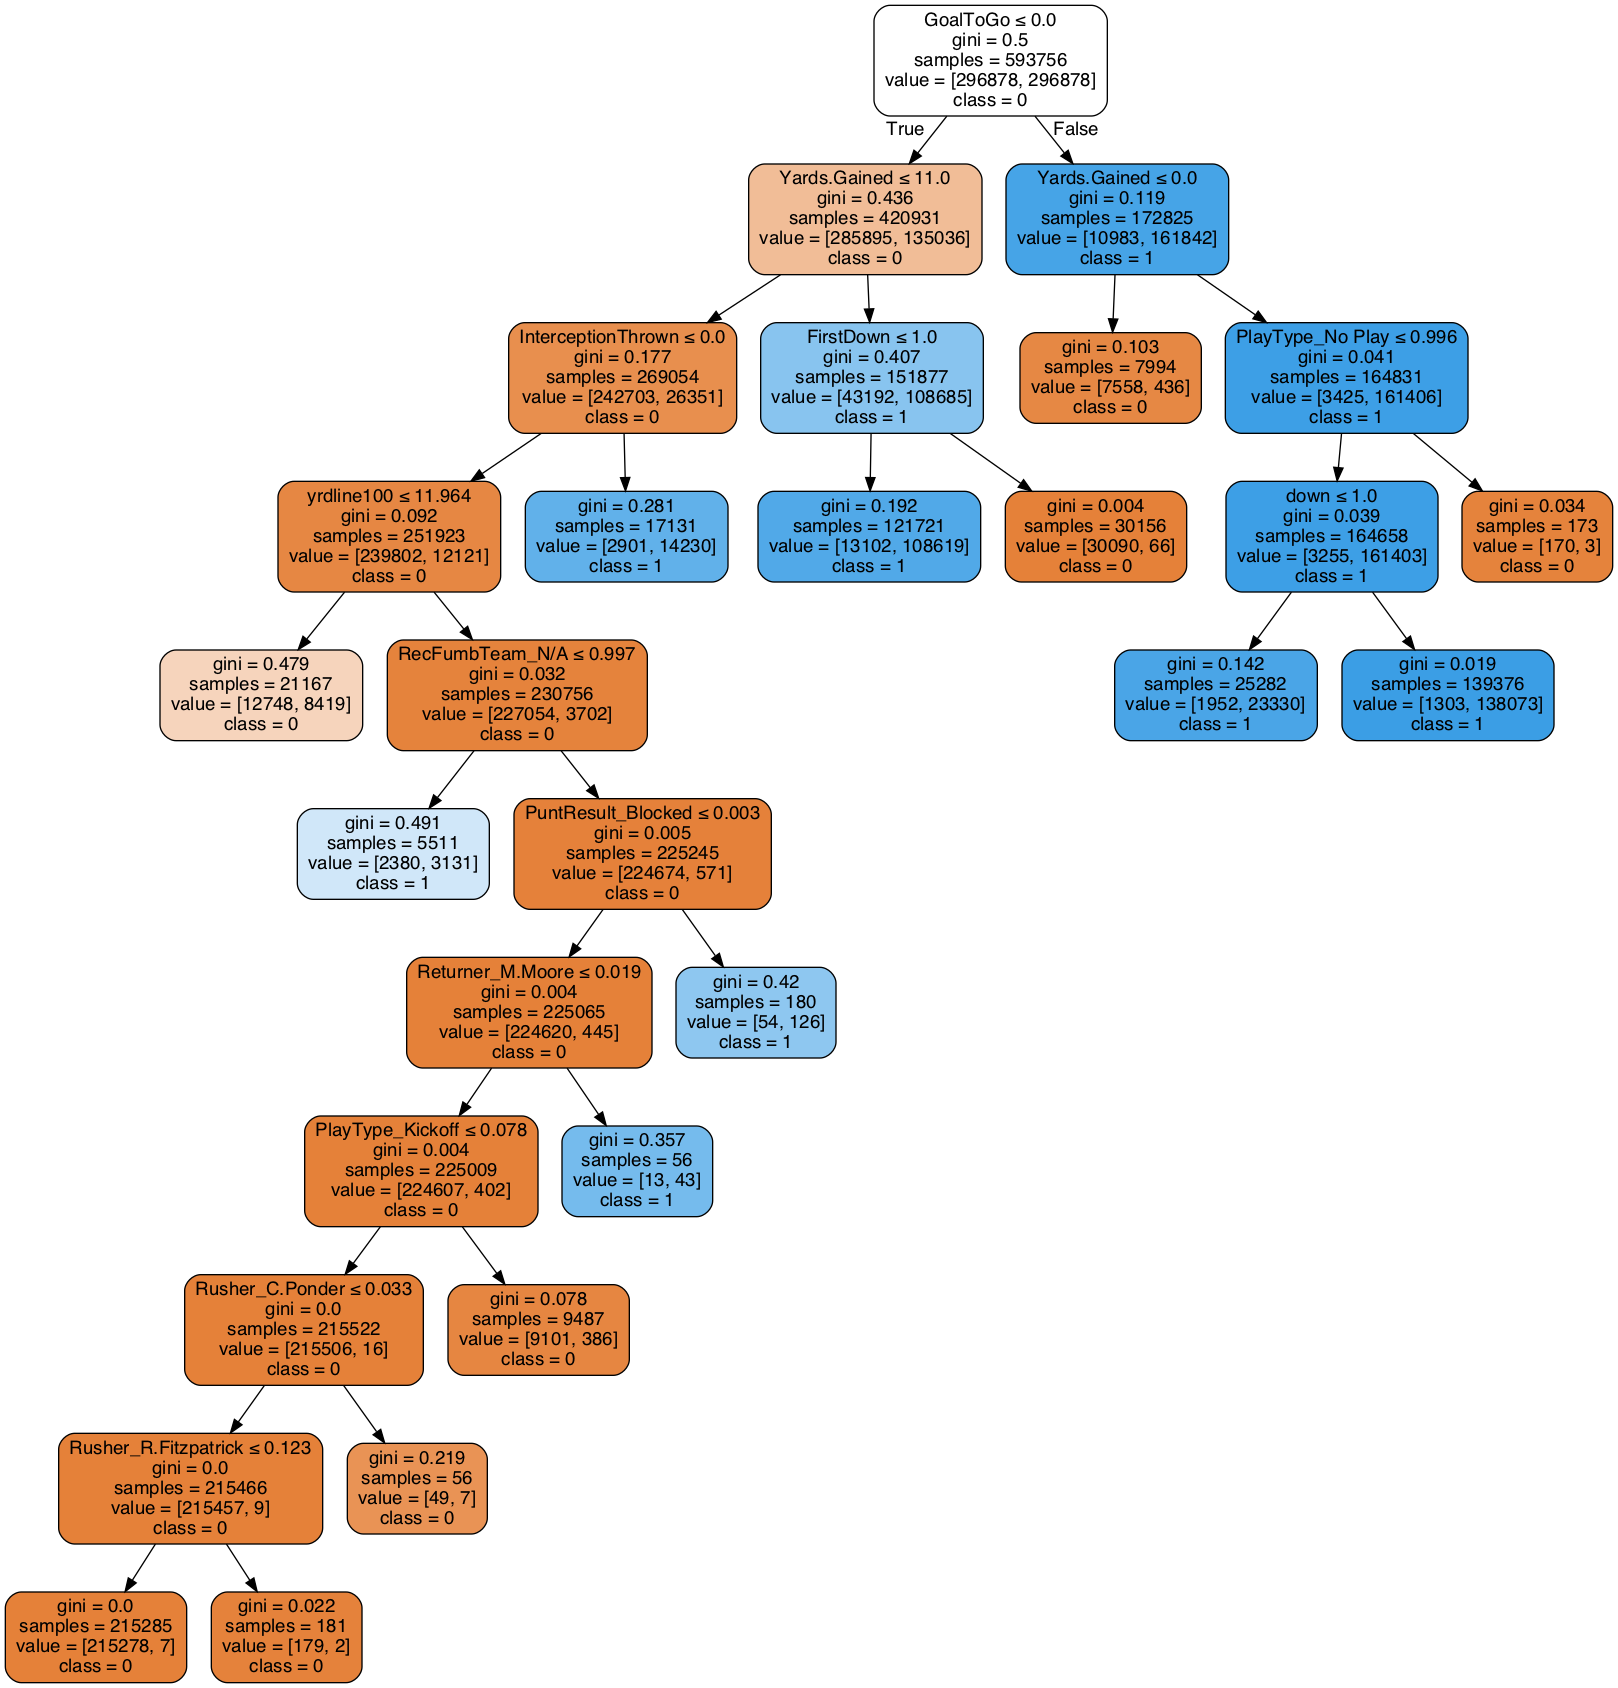

In [69]:
dot_data = export_graphviz(tree_clf_3, out_file=None, 
                           feature_names=X.columns,  
                           class_names=np.unique(y).astype('str'), 
                           filled=True, rounded=True, special_characters=True)

graph = graph_from_dot_data(dot_data)  

Image(graph.create_png())

## Random Forests Model 1 - Vanilla model

In [39]:
forest = RandomForestClassifier()  

forest.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     98959
           1       0.88      0.27      0.42      2963

    accuracy                           0.98    101922
   macro avg       0.93      0.64      0.70    101922
weighted avg       0.98      0.98      0.97    101922



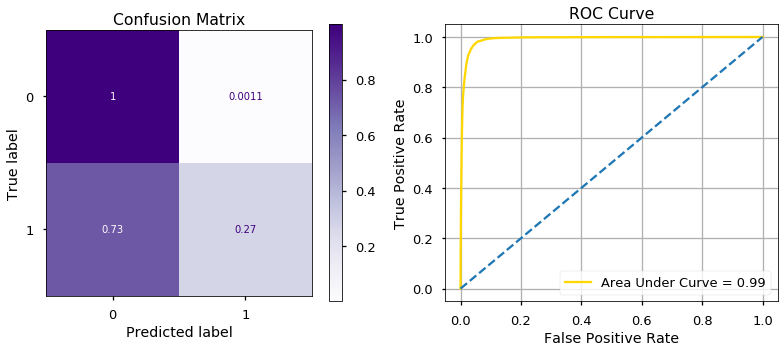

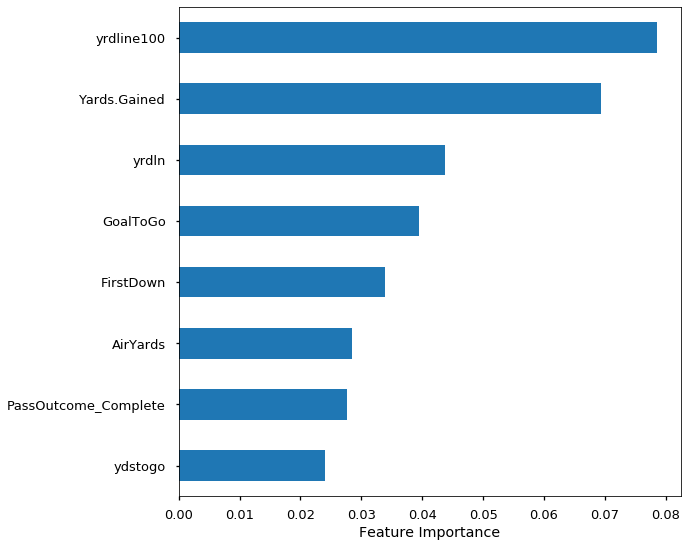

Train score = 1.0
Test score = 0.9777771236828162


In [91]:
pred = forest.predict(X_test)

model_performance(y_test,pred,X_test,forest)

accuracy(X_train_new, y_train_new, X_test, y_test, forest)

## Random Forests Model 2 - Tune max depth

In [41]:
forest_2 = RandomForestClassifier(max_depth=10)  

forest_2.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     98959
           1       0.28      0.62      0.38      2963

    accuracy                           0.94    101922
   macro avg       0.63      0.79      0.68    101922
weighted avg       0.97      0.94      0.95    101922



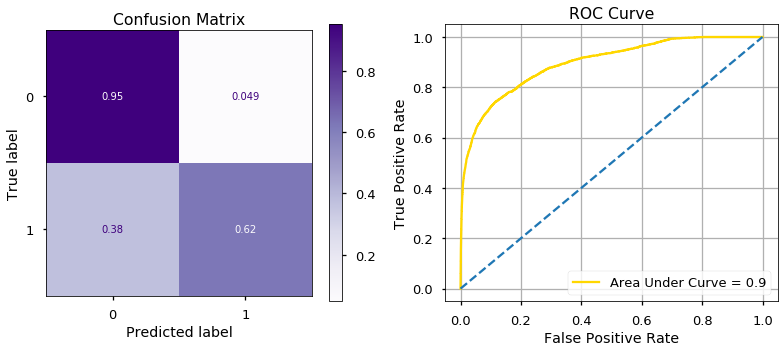

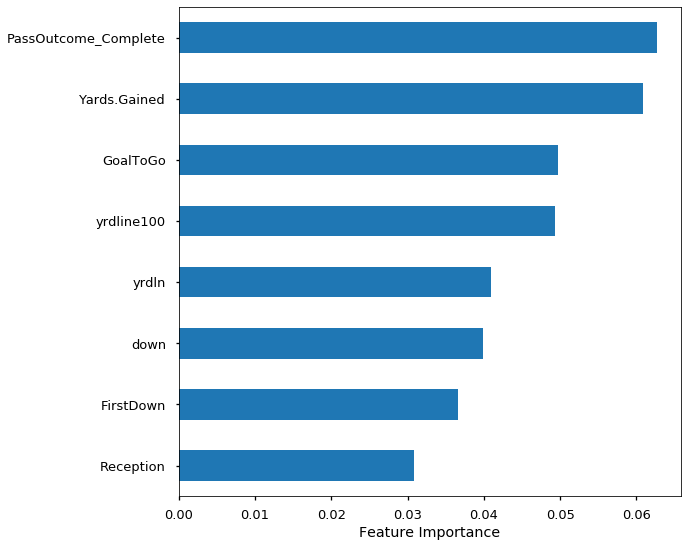

Train score = 0.9352141283624923
Test score = 0.941837876022841


In [92]:
pred = forest_2.predict(X_test)

model_performance(y_test,pred,X_test,forest_2)

accuracy(X_train_new, y_train_new, X_test, y_test, forest_2)

## Random Forests Model 3 - Tune max depth and min-samples-split

In [43]:
forest_3 = RandomForestClassifier(max_depth=10, min_samples_split=.25)  

forest_3.fit(X_train_new, y_train_new)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.25,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     98959
           1       0.14      0.55      0.23      2963

    accuracy                           0.89    101922
   macro avg       0.56      0.73      0.59    101922
weighted avg       0.96      0.89      0.92    101922



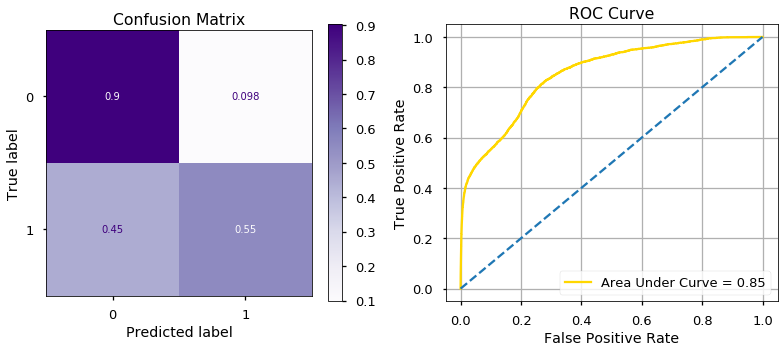

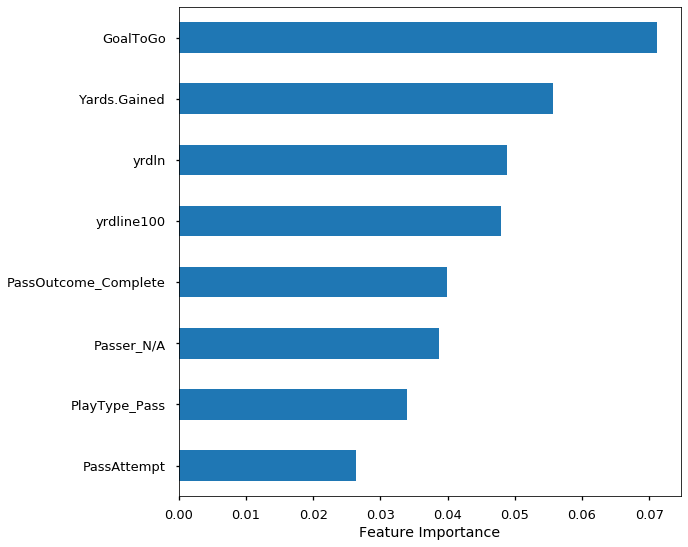

Train score = 0.8949517983818269
Test score = 0.8917898000431703


In [93]:
pred = forest_3.predict(X_test)

model_performance(y_test,pred,X_test,forest_3)

accuracy(X_train_new, y_train_new, X_test, y_test, forest_3)

### For this project, I ran 6 different models, which consisted of 3 Decision Trees and 3 Random Forests. After analyzing the results for each model, I believe the best model to go forward with is Decision Trees Model 3. It provides a good balance of high recall, high accuracy, dependable AUC, and not being ***too*** perfect. It performed well, but has enough breathing room to confidently predict new data, if it were to be introduced to it.

# Conclusion

### Based on the results of the specified model (Decision Trees Model 3), we were able to achieve the following results:

 - 89% correct on predictions of touchdown plays
 - 93% correct on predictions of non-touchdown plays
 - A 0.97 AUC score, showing very high reliability
 - Overall testing accuracy of 92.51% 

### And the top 5 most important features were as follows:
 - Goal to Go (Positive Influence)
 - Yards Gained (Positive Influence)
 - First Down (Negative Influence)
 - Interception Thrown (Negative Influence)
 - Yard Line 1-100 (Negative Influence)

# Recommendations

### Following in the path of the MLB, the NFL is becoming more and more of a data-driven league with each year that passes. From evaluating potential draft prospects to making a decision whether or not to go for a two-point conversion in the second quarter, data and its respective analysis is becoming a largely important factor in risk management for coaches and front offices across the league. Further developing the data to even better predict touchdowns is going to become invaluable to each NFL team as time goes on. But, given the data accssesible to me and the results I was able to produce, here are some recommendations I would make:

 - ***Offensive coaches***: Be patient. It's often a cliche in football, but the data shows that getting the ball closer to the end zone ***and*** not being careless with it (i.e. throwing interceptions) will increase your chances of scoring touchdowns. The 99 yard play that goes for a touchdown is great - but the 1 yard touchdown scores the same amount of points.
 
 - ***Defensive coaches***: Maintain controlled aggressiveness. Forcing interceptions and limiting the amount of positive yardage the opposing offense gets will better enable your defense its ability to prevent touchdowns from being scored. If the offense is able to get into your own 10 yard line, that is when the strongest effort to stop them must be made. ***Remember*** - the offense can get as many first downs as they want - but you can't have a first down and a touchdown on the same play.